In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('F:\VAC\Real estate price prediction\Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
# Finding out the missing value
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
new=df['X1 transaction date'].astype(str).str.split(".",n=1,expand=True)

In [7]:
df['transaction_year']=new[0]

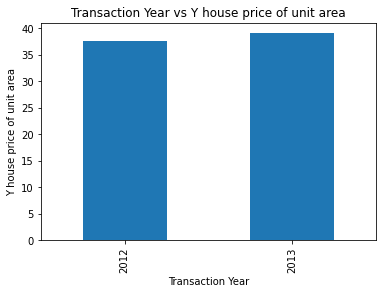

In [8]:
data=df.copy()
data.groupby('transaction_year')['Y house price of unit area'].median().plot.bar()
plt.title('Transaction Year vs Y house price of unit area')
plt.xlabel('Transaction Year')
plt.ylabel('Y house price of unit area')
plt.show()

In [9]:
numeric_feature= list(df.select_dtypes(include=['int64','float64']).keys())
numeric_feature

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

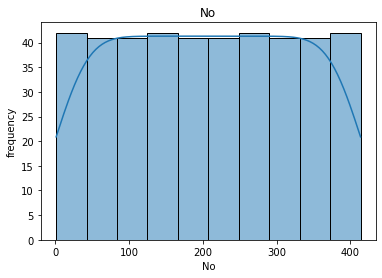

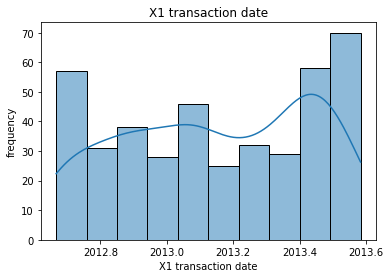

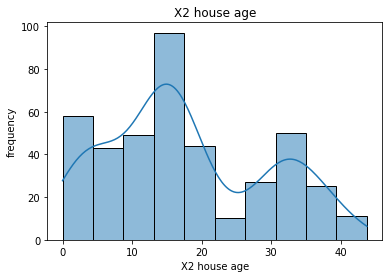

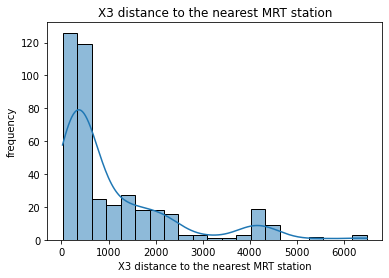

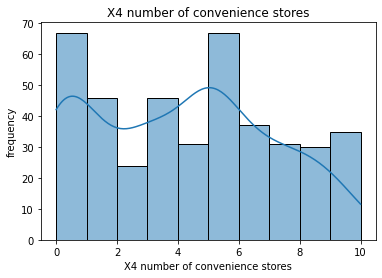

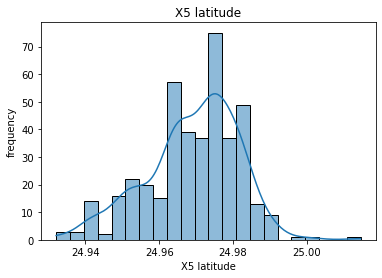

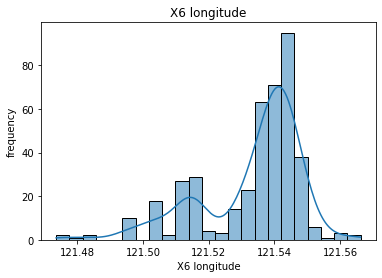

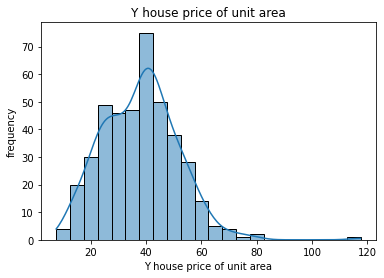

In [10]:
for feature in numeric_feature:
    sns.histplot(data=df,x=feature,kde=True,palette='pastel')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

In [11]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
transaction_year                           object
dtype: object

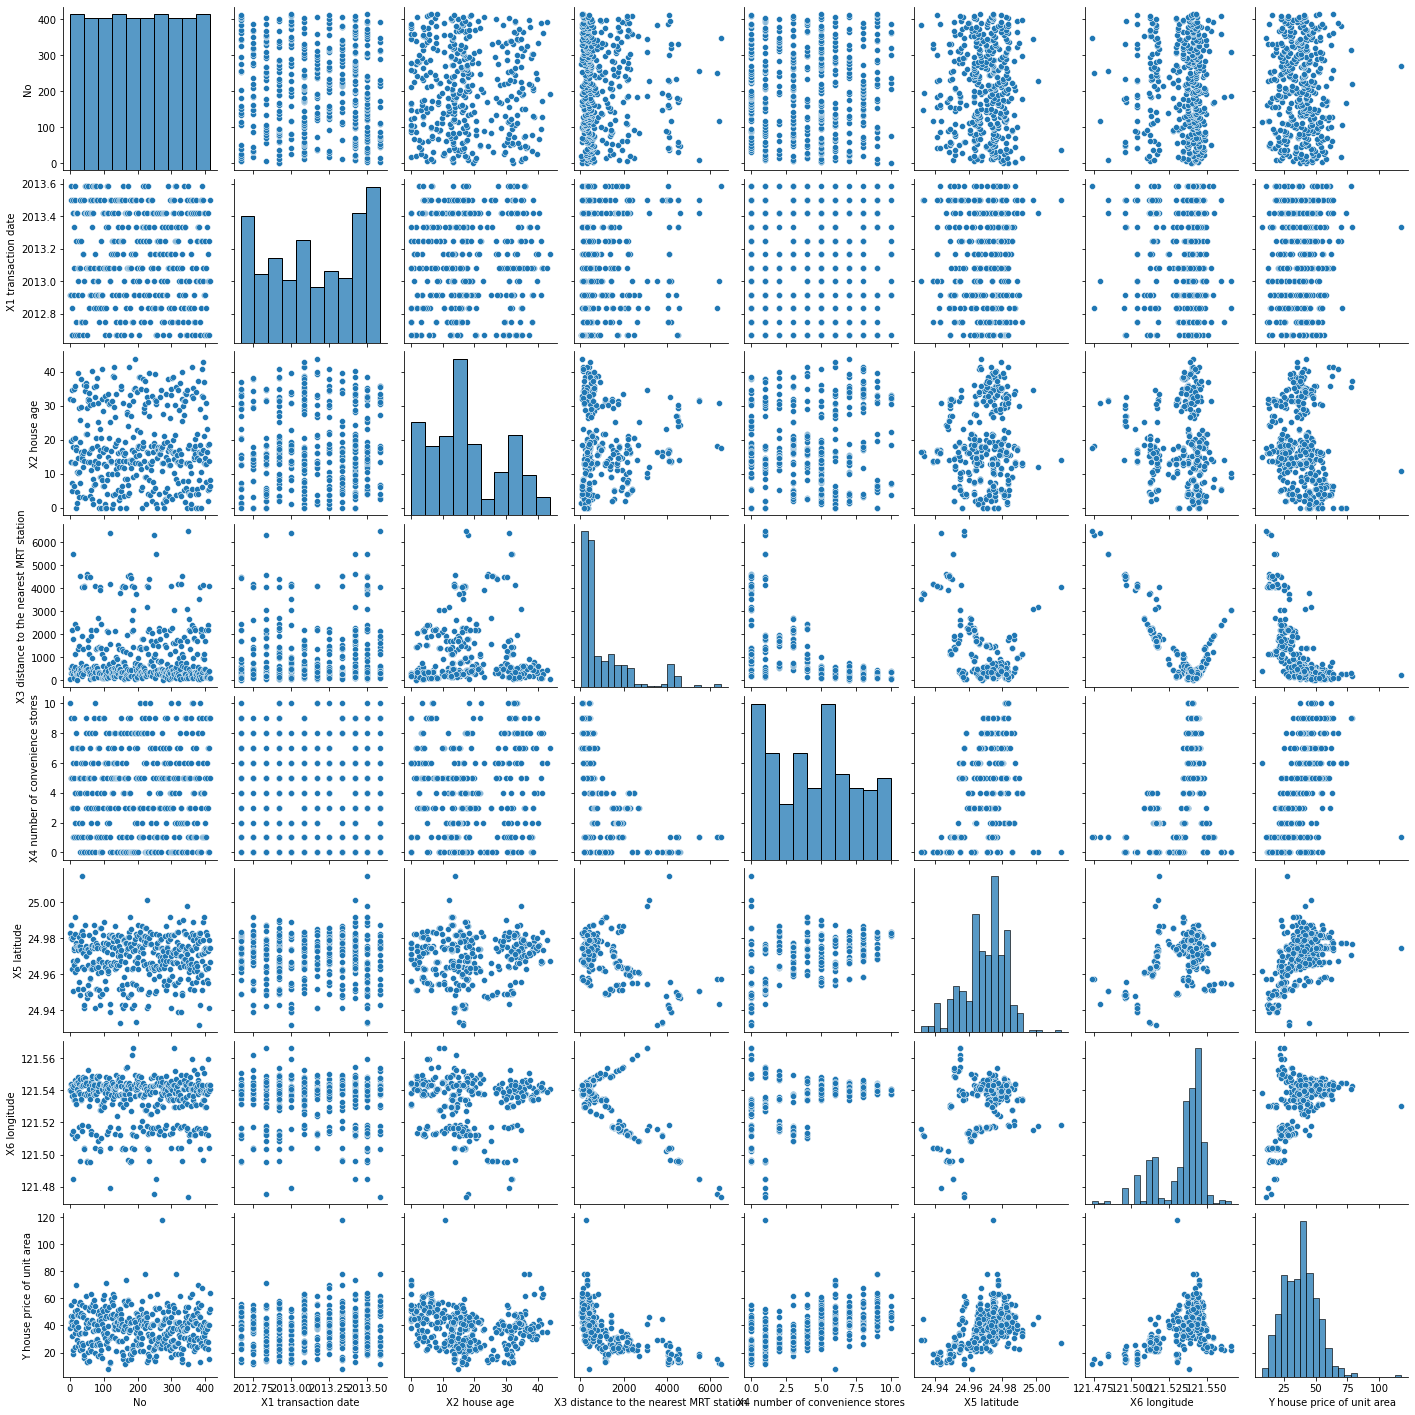

In [12]:
g = sns.pairplot(df)
g.map_upper(plt.scatter)

In [13]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [14]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [15]:
static=pd.get_dummies(df['transaction_year'],prefix_sep='_',prefix='year')
static

,year_2012,year_2013
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
409,0,1
410,1,0
411,0,1
412,0,1


In [16]:
# merge the static into main dataframe
df=pd.concat([df,static],axis=1)

In [17]:
# drop the transaction_year column and print top-5 records
df.drop('transaction_year',axis=1,inplace=True)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year_2012,year_2013
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0,1
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0,1
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1,0


<AxesSubplot:>

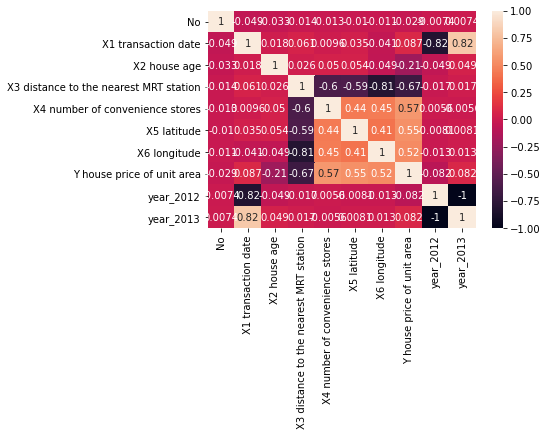

In [18]:
sns.heatmap(df.corr(), annot=True)

C:\Users\Ampolu Nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

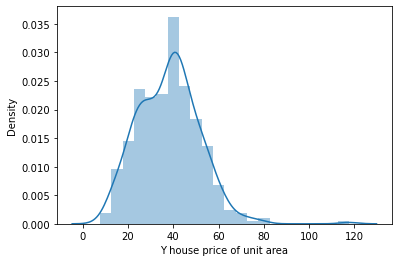

In [19]:
sns.distplot(df['Y house price of unit area'])

# Training a Linear Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [21]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5,random_state = 101)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit (X_train, y_train)

LinearRegression()

In [24]:
lin_reg.coef_

pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficients'])

,Coefficients
No,-0.004792
X1 transaction date,1.839724
X2 house age,-0.283049
X3 distance to the nearest MRT station,-0.004895
X4 number of convenience stores,0.902771
X5 latitude,244.516450
X6 longitude,-45.236722
year_2012,-0.829578
year_2013,0.829578


In [32]:
y_pred = lin_reg.predict(X_test)

# Evalutaing the Model

In [26]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.516995
MSE,51.195934
RMSE,7.155133


In [27]:
test_residuals=y_test - y_pred
test_residuals.head()

176    5.164825
347    1.346023
307    4.731548
299   -1.014699
391    1.235454
Name: Y house price of unit area, dtype: float64

Text(0, 0.5, 'Y-Pred')

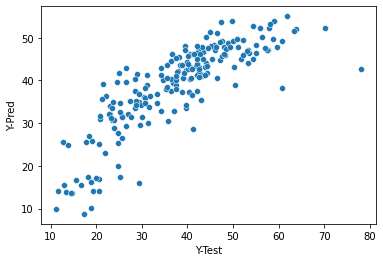

In [28]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

C:\Users\Ampolu Nisha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

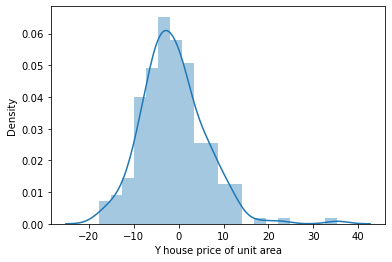

In [29]:
sns.distplot(test_residuals)

In [30]:
df['Y house price of unit area'].mean()

37.98019323671498